In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Year  25793 non-null  int64  
 1   Title         25793 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Vote_Count    25793 non-null  int64  
 4   Vote_Average  25793 non-null  float64
 5   Genre         25793 non-null  object 
 6   Rating        25793 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.4+ MB


Casting 'Genre' & 'Category' column into category

In [3]:
df['Genre'] = df['Genre'].astype('category')
df['Rating'] = df['Rating'].astype('category')

#confirming changes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Year  25793 non-null  int64   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
 6   Rating        25793 non-null  category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 1.0+ MB


In [108]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [109]:
df.nunique() #checking Unique values

Release_Year     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average      74
Genre             19
Rating             4
dtype: int64

Now as the Tranformation is completed, The next step is to derive Insights from this Data with help of Visualization

In [ ]:
sns.set_style('whitegrid')

What is the Most frequent Genre of Movie?

In [11]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

Below Chart shows, the most frequest genre of the movies the are release accross the years.

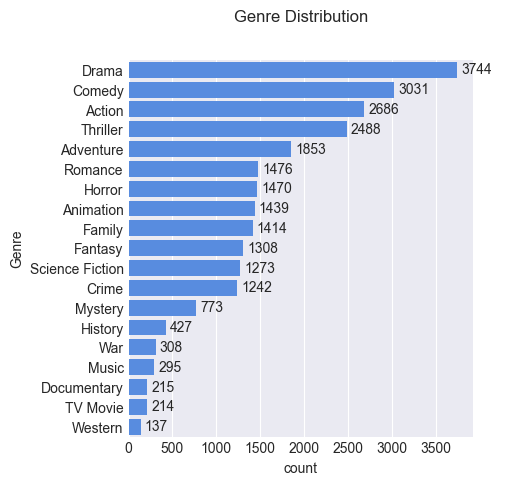

In [32]:
g = sns.catplot(y = 'Genre', data = df, kind = 'count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('Genre column distribution')
ax = g.ax
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Genre Distribution', y = 1.08 )
plt.tight_layout()

plt.show()

 Below chart shows how many movies came over the years.  It puts the years in order and colors the bars blue. The year labels are tilted so they’re easier to read.

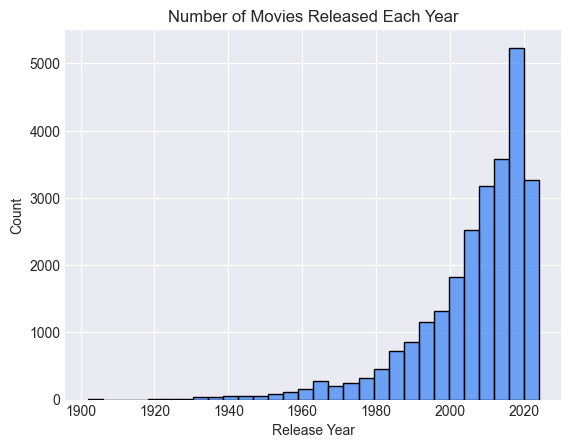

In [56]:
sns.histplot(x='Release_Year', data=df,color='#4287f5', bins = 30)

plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
# plt.tight_layout()
plt.show()

This chart shows which movie genres are the most liked on average. It compares the popularity scores of each genre using bars. The longer the bar, the more popular that genre is overall

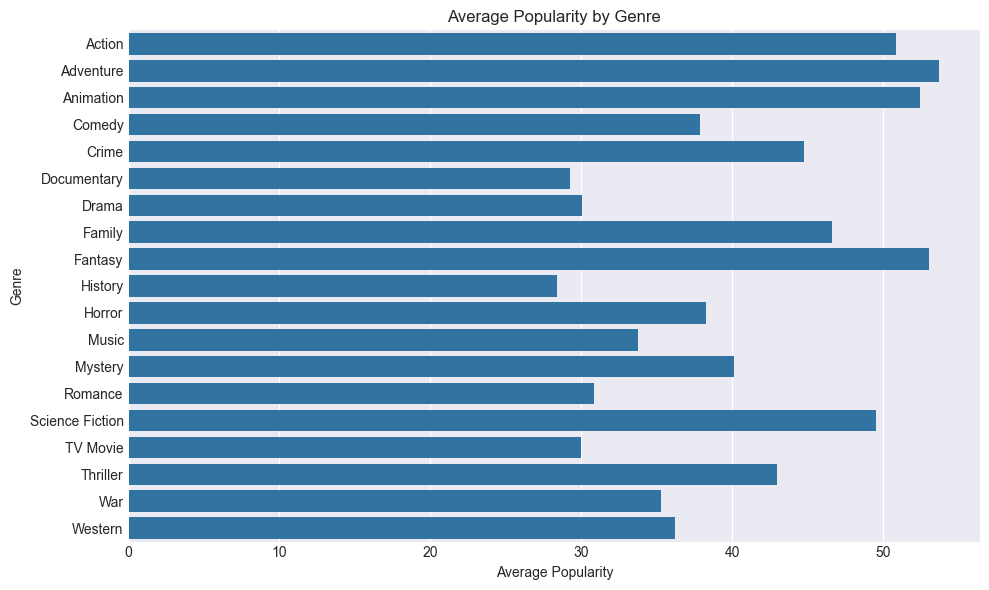

In [34]:
genre_popularity = df.groupby('Genre', observed=True)['Popularity'].mean().reset_index()


genre_popularity = genre_popularity.sort_values(by='Popularity', ascending=False)

plt.figure(figsize=(10, 6))


sns.barplot(data=genre_popularity, y='Genre', x='Popularity')

plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Correaltion Analysis:
look at how popularity and votes are related.
More votes usually mean higher popularity, but not always a better rating.
High vote counts and average ratings suggest wide reach, not necessarily love.

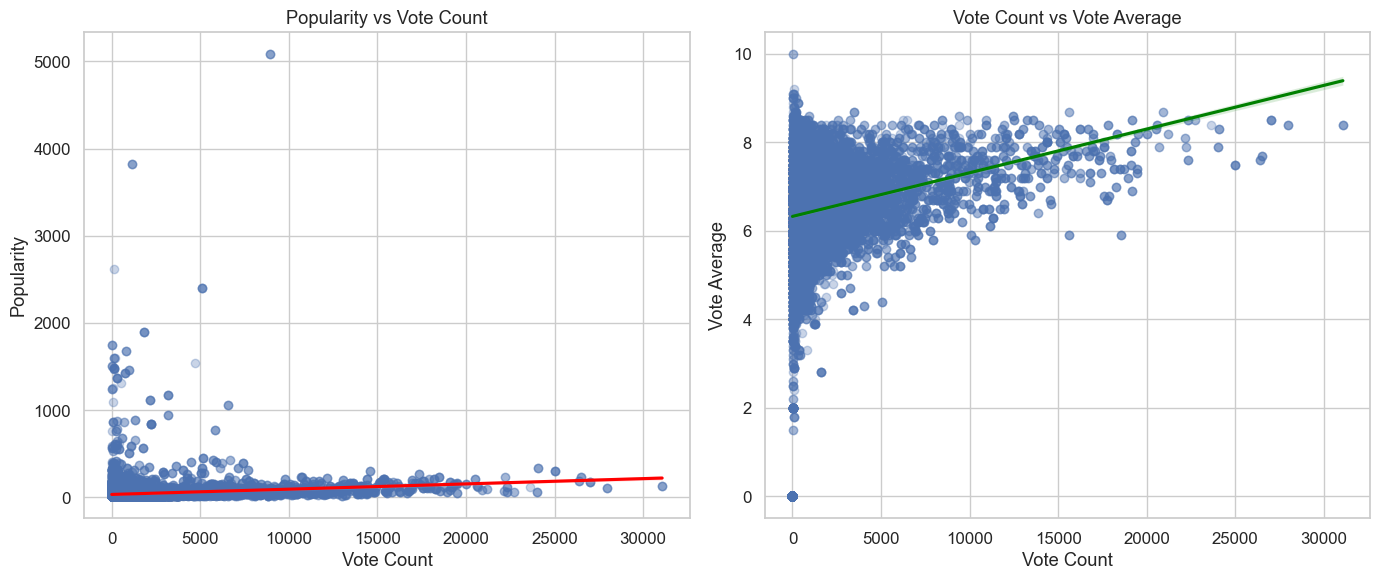

In [7]:

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(14, 6))

# 1. Popularity vs Vote_Count
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='Vote_Count', y='Popularity', scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title('Popularity vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')

# 2. Vote_Count vs Vote_Average
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Vote_Count', y='Vote_Average', scatter_kws={'alpha':0.3}, line_kws={"color": "green"})
plt.title('Vote Count vs Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')

plt.tight_layout()
plt.show()

Some movies were voted on a lot but still rated poorly.
This means many people watched them but didn’t enjoy them.
It highlights titles that got attention but failed to impress.

In [116]:
c_popularity = df[(df['Popularity'] > df['Popularity'].quantile(0.95)) & 
                      (df['Vote_Average'] < df['Vote_Average'].quantile(0.25))]

# High vote count, but low rating
c_votes = df[(df['Vote_Count'] > df['Vote_Count'].quantile(0.95)) & 
                 (df['Vote_Average'] < df['Vote_Average'].quantile(0.25))]

print("Popular but poorly rated:")
print(c_popularity[['Title', 'Popularity', 'Vote_Average']].head())

print("\nHighly voted but poorly rated:")
print(c_votes[['Title', 'Vote_Count', 'Vote_Average']].head())

Popular but poorly rated:
                   Title  Popularity  Vote_Average
22  Fistful of Vengeance    1594.013           5.3
23  Fistful of Vengeance    1594.013           5.3
24  Fistful of Vengeance    1594.013           5.3
26               Pursuit    1500.523           5.9
27               Pursuit    1500.523           5.9

Highly voted but poorly rated:
                                  Title  Vote_Count  Vote_Average
607  Batman v Superman: Dawn of Justice       15596           5.9
608  Batman v Superman: Dawn of Justice       15596           5.9
609  Batman v Superman: Dawn of Justice       15596           5.9
847                Fifty Shades of Grey       10087           5.9
848                Fifty Shades of Grey       10087           5.9


Colors each movie by its Rating category. See how “popular” movies get more votes, and how “unpopular” ones fare.

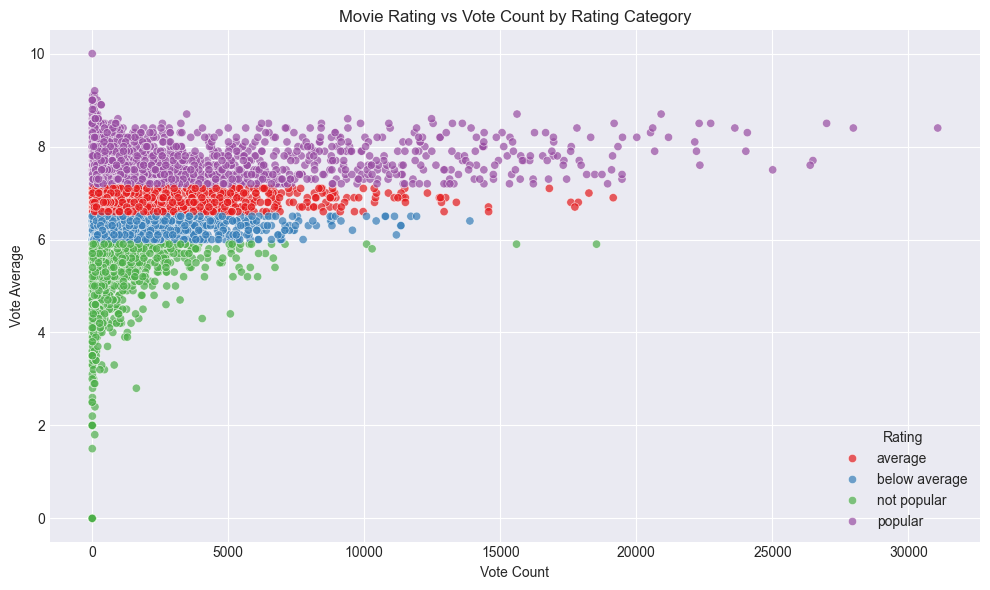

In [11]:
df_unique = df.drop_duplicates(subset=["Title"])
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unique,
                x="Vote_Count", 
                y="Vote_Average", 
                hue="Rating",
                palette="Set1",
                alpha=0.7)

plt.title("Movie Rating vs Vote Count by Rating Category")
plt.xlabel("Vote Count")
plt.ylabel("Vote Average")
plt.legend(title="Rating")
plt.tight_layout()
plt.show()

Which genre has the lowest Vote and Count Avg?

In [43]:
lowest_rated_genre = df.groupby("Genre", observed=True)[["Vote_Average", "Vote_Count"]].mean().sort_values("Vote_Average").head(1)
print(lowest_rated_genre)


        Vote_Average  Vote_Count
Genre                           
Horror      5.940068  985.364626


Which genre has the Highest Vote and Count Avg?

In [44]:
highest_rated_genre = df.groupby("Genre", observed=True)[["Vote_Average", "Vote_Count"]].mean().sort_values("Vote_Average",ascending=False).head(1)
print(highest_rated_genre)


         Vote_Average   Vote_Count
Genre                             
History      6.965574  1234.323185
